In [2]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
path = './archive/NFLX.csv'
data = pd.read_csv(path, encoding='cp949')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [4]:
df = pd.read_csv(path, encoding='cp949', usecols = ['Date', 'Open', 'High', 'Low', 'Close'])
df

,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1009 non-null   object 
 1   Open    1009 non-null   float64
 2   High    1009 non-null   float64
 3   Low     1009 non-null   float64
 4   Close   1009 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.5+ KB


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1009 non-null   datetime64[ns]
 1   Open    1009 non-null   float64       
 2   High    1009 non-null   float64       
 3   Low     1009 non-null   float64       
 4   Close   1009 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 39.5 KB


In [7]:
df_after_2021 = df[df['Date'] > '2021-01-01']
df_after_2021

,Date,Open,High,Low,Close
733,2021-01-04,539.000000,540.799988,515.090027,522.859985
734,2021-01-05,521.549988,526.780029,515.890015,520.799988
735,2021-01-06,511.970001,513.099976,499.500000,500.489990
736,2021-01-07,508.279999,516.440002,506.420013,508.890015
737,2021-01-08,511.309998,513.239990,504.510010,510.399994
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


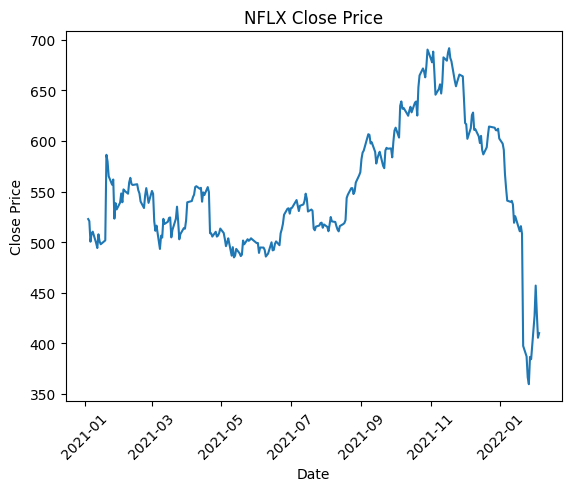

In [8]:
x = df_after_2021.Date
y = df_after_2021.Close

plt.plot(x, y)

plt.title('NFLX Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')

# x 축 설정(회전시키기)
plt.xticks(rotation=45)

plt.show()


In [9]:
max_price = max(df_after_2021.Close)
min_price = min(df_after_2021.Close)

print('최고종가 : ', max_price)
print('최저종가 : ', min_price)

최고종가 :  691.690002
최저종가 :  359.700012


In [10]:
df_after_2021['month'] = df_after_2021['Date'].dt.strftime("%Y-%m")
df_after_2021

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_400\3849938683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_2021['month'] = df_after_2021['Date'].dt.strftime("%Y-%m")


,Date,Open,High,Low,Close,month
733,2021-01-04,539.000000,540.799988,515.090027,522.859985,2021-01
734,2021-01-05,521.549988,526.780029,515.890015,520.799988,2021-01
735,2021-01-06,511.970001,513.099976,499.500000,500.489990,2021-01
736,2021-01-07,508.279999,516.440002,506.420013,508.890015,2021-01
737,2021-01-08,511.309998,513.239990,504.510010,510.399994,2021-01
...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,2022-01
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,2022-02
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,2022-02
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,2022-02


In [11]:
df_month = df_after_2021.groupby(['month'])['Close'].mean(numeric_only=True).reset_index()
df_month

,month,Close
0,2021-01,526.816845
1,2021-02,548.959999
2,2021-03,518.123482
3,2021-04,533.136662
4,2021-05,496.714497
5,2021-06,503.324091
6,2021-07,528.653330
7,2021-08,532.346817
8,2021-09,590.795239
9,2021-10,642.202849


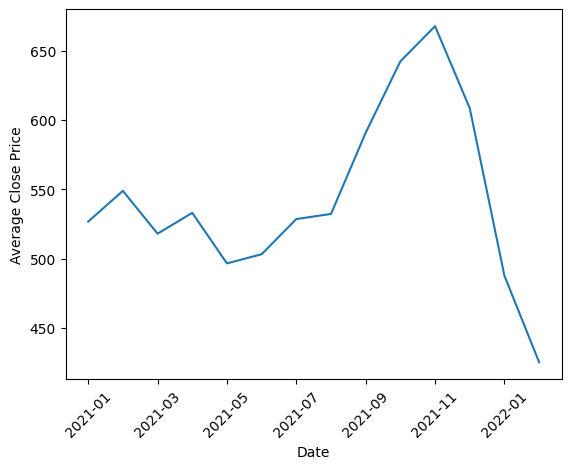

In [12]:
x = df_month['month']
y = df_month['Close']

plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('Average Close Price')

plt.xticks(x[::2], rotation = 45)

plt.show()

In [13]:
df_after_2022 = df[df['Date'] >= '2022-01-01']
df_after_2022

,Date,Open,High,Low,Close
985,2022-01-03,605.609985,609.989990,590.559998,597.369995
986,2022-01-04,599.909973,600.409973,581.599976,591.150024
987,2022-01-05,592.000000,592.840027,566.880005,567.520020
988,2022-01-06,554.340027,563.359985,542.010010,553.289978
989,2022-01-07,549.460022,553.429993,538.219971,541.059998
990,2022-01-10,538.489990,543.690002,526.320007,539.849976
991,2022-01-11,536.989990,543.909973,530.070007,540.840027
992,2022-01-12,544.270020,544.270020,532.020020,537.219971
993,2022-01-13,537.059998,540.789978,518.260010,519.200012
994,2022-01-14,517.599976,538.369995,511.880005,525.690002


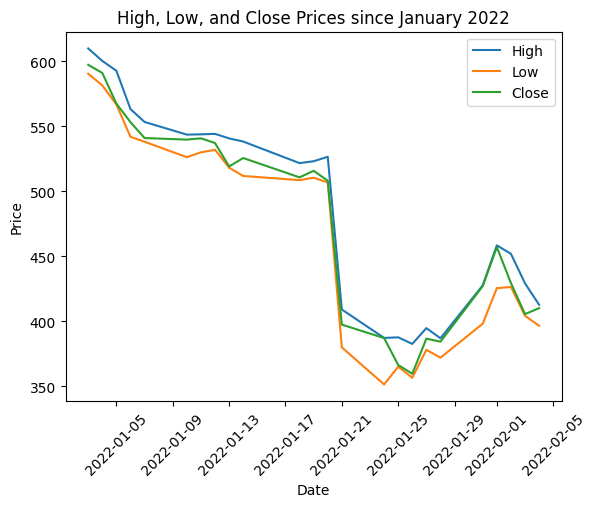

In [14]:
x = df_after_2022['Date']
high = df_after_2022['High']
low = df_after_2022['Low']
close = df_after_2022['Close']

plt.plot(x, high , label = 'High')
plt.plot(x, low, label = 'Low')
plt.plot(x, close, label = 'Close')

plt.title('High, Low, and Close Prices since January 2022')

plt.legend()

plt.xlabel('Date')
plt.ylabel('Price')

plt.xticks(rotation = 45)

plt.show()